In [7]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from sklearn.preprocessing import RobustScaler
plt.style.use("bmh")

# Technical Analysis library
import ta

# Neural Network library
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


# Loading in the Data
df = pd.read_csv("/Users/adish007/Downloads/SPY (1).csv")

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-09,218.130005,218.759995,217.800003,218.179993,198.847122,51251700
1,2016-08-10,218.309998,218.399994,217.229996,217.639999,198.354935,57941100
2,2016-08-11,218.259995,218.940002,217.949997,218.649994,199.275436,72504300
3,2016-08-12,218.289993,218.710007,217.990005,218.460007,199.102264,61313500
4,2016-08-15,218.889999,219.500000,218.880005,219.089996,199.676453,49813500
...,...,...,...,...,...,...,...
1253,2021-08-02,440.339996,440.929993,437.209991,437.589996,437.589996,58783300
1254,2021-08-03,438.440002,441.279999,436.100006,441.149994,441.149994,58053900
1255,2021-08-04,439.779999,441.119995,438.730011,438.980011,438.980011,46732200
1256,2021-08-05,440.220001,441.850006,439.880005,441.760010,441.760010,38969700


In [9]:
## Datetime conversion
df['Date'] = pd.to_datetime(df.Date)

# Setting the index
df.set_index('Date', inplace=True)

# Dropping any NaNs
df.dropna(inplace=True)



## Technical Indicators

# Adding all the indicators
df = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

# Dropping everything else besides 'Close' and the Indicators
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

# Only using the last 1000 days of data to get a more accurate representation of the current market climate
df = df.tail(1000)



## Scaling

# Scale fitting the close prices separately for inverse_transformations purposes later
close_scaler = RobustScaler()

close_scaler.fit(df[['Close']])

# Normalizing/Scaling the DF
scaler = RobustScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

/opt/anaconda3/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/anaconda3/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [10]:
df

,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-17,-0.788677,-1.230796,-1.446438,-0.421179,-1.268335,-0.576568,-0.745954,-0.453075,-1.988874,-0.416204,...,-1.885525,-0.510222,-0.722250,-1.053196,1.129198,0.577624,1.547147,-1.675529,-1.690214,-0.788677
2017-08-18,-0.794967,-1.255183,-1.568869,-0.886388,-1.217603,-1.059609,-0.360191,-0.531328,-2.294265,-0.416204,...,-1.707647,-0.542079,-0.727327,-1.124285,1.593349,0.837829,2.150573,-0.259736,-0.260168,-0.794967
2017-08-21,-0.791822,-1.241720,-1.510254,-0.842257,-1.044953,-1.351962,-0.252777,-0.572426,-0.287718,-0.415744,...,-1.531842,-0.635342,-0.732240,-1.029759,1.324498,0.980447,1.221840,-0.022964,-0.022975,-0.791822
2017-08-22,-0.749772,-1.222637,-1.453724,-0.638606,-0.600254,-1.062910,0.648665,-0.386462,0.565888,-0.409596,...,-0.692247,-0.695290,-0.732273,-0.730278,1.078930,1.034671,0.523686,0.953442,0.949328,-0.749772
2017-08-23,-0.764341,-1.224495,-1.498672,-0.640530,-0.629352,-1.077343,-0.092632,-0.385759,0.340039,-0.411726,...,-0.983130,-0.770336,-0.732768,-0.920734,0.756205,0.999369,-0.183409,-0.463838,-0.465081,-0.764341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,2.431256,0.974415,1.169208,0.645804,-0.306801,-0.176362,0.011182,-0.046975,-0.576201,2.175201,...,-0.042096,0.520810,2.378161,-0.218217,-0.082532,0.110993,-0.448109,-0.313721,-0.314327,2.431256
2021-08-03,2.490192,0.994588,1.221184,0.730096,0.125300,-0.191298,-0.468836,-0.115995,0.211815,2.201063,...,0.378046,0.485667,2.393117,0.354452,-0.115090,0.048002,-0.402099,0.719132,0.716854,2.490192
2021-08-04,2.454268,0.981067,1.179345,0.452949,-0.122229,0.083852,0.597028,0.354382,0.107761,2.185299,...,0.121950,0.448041,2.395790,0.715632,-0.264629,-0.038848,-0.590549,-0.598427,-0.600433,2.454268


In [11]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the multivariate time sequence
    """
    
    # Creating a list for both variables
    X, y = [], []
    
    for i in range(len(seq)):
        
        # Finding the end of the current sequence
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        # Breaking out of the loop if we have exceeded the dataset's length
        if out_end > len(seq):
            break
        
        # Splitting the sequences into: x = past prices and indicators, y = prices ahead
        seq_x, seq_y = seq[i:end, :], seq[end:out_end, 0]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)
  
  
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(16,5))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(16,5))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass
          
          
def validater(n_per_in, n_per_out):
    """
    Runs a 'For' loop to iterate through the length of the DF and create predicted values for every stated interval
    Returns a DF containing the predicted values for the model with the corresponding index values based on a business day frequency
    """
    
    # Creating an empty DF to store the predictions
    predictions = pd.DataFrame(index=df.index, columns=[df.columns[0]])

    for i in range(n_per_in, len(df)-n_per_in, n_per_out):
        # Creating rolling intervals to predict off of
        x = df[-i - n_per_in:-i]

        # Predicting using rolling intervals
        yhat = model.predict(np.array(x).reshape(1, n_per_in, n_features))

        # Transforming values back to their normal prices
        yhat = close_scaler.inverse_transform(yhat)[0]

        # DF to store the values and append later, frequency uses business days
        pred_df = pd.DataFrame(yhat, 
                               index=pd.date_range(start=x.index[-1], 
                                                   periods=len(yhat), 
                                                   freq="B"),
                               columns=[x.columns[0]])

        # Updating the predictions DF
        predictions.update(pred_df)
        
    return predictions


def val_rmse(df1, df2):
    """
    Calculates the root mean square error between the two Dataframes
    """
    df = df1.copy()
    
    # Adding a new column with the closing prices from the second DF
    df['close2'] = df2.Close
    
    # Dropping the NaN values
    df.dropna(inplace=True)
    
    # Adding another column containing the difference between the two DFs' closing prices
    df['diff'] = df.Close - df.close2
    
    # Squaring the difference and getting the mean
    rms = (df[['diff']]**2).mean()
    
    # Returning the sqaure root of the root mean square
    return float(np.sqrt(rms))

In [12]:
# How many periods looking back to learn
n_per_in  = 90
# How many periods to predict
n_per_out = 30
# Features 
n_features = df.shape[1]
# Splitting the data into appropriate sequences
X, y = split_sequence(df.to_numpy(), n_per_in, n_per_out)

In [13]:
## Creating the NN

# Instatiating the model
model = Sequential()

# Activation
activ = "tanh"

# Input layer
model.add(LSTM(90, 
               activation=activ, 
               return_sequences=True, 
               input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=1, 
            n_nodes=30, 
            activation=activ)

# Final Hidden layer
model.add(LSTM(60, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

# Compiling the data with selected specifications
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## Fitting and Training
res = model.fit(X, y, epochs=50, batch_size=128, validation_split=0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 90)            63000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 30)            14520     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                21840     
_________________________________________________________________
dense (Dense)                (None, 30)                1830      
Total params: 101,190
Trainable params: 101,190
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
7/7 [==============================] - 30s 556ms/step - loss: 0.3507 - accuracy: 0.0270 - val_loss: 3.0399 - val_accuracy: 0.0674
Epoch 2/50
7/7 [==============================] - 2s 283ms/step - loss: 0.2137 - accuracy: 0.0477 - val_los

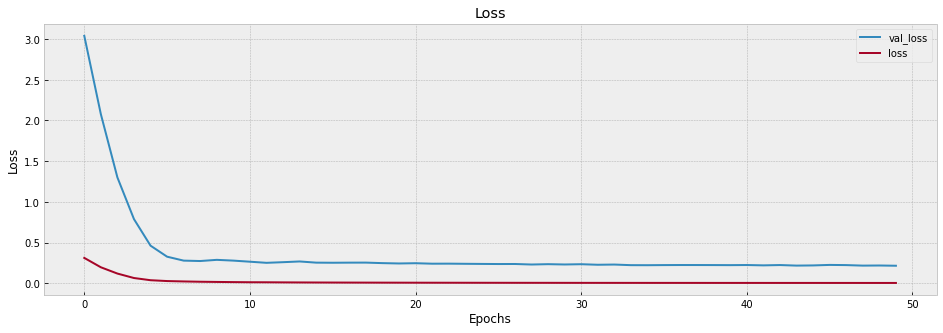

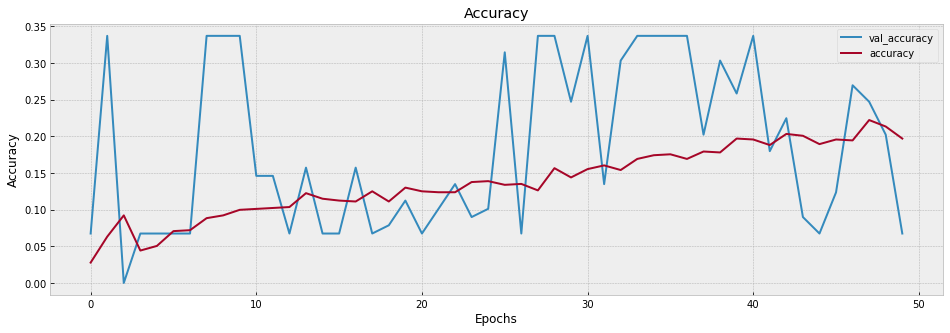

In [14]:
visualize_training_results(res)

As our network trains, we can see that the Loss decreasing and Accuracy increasing. As a general rule, we are looking for the two lines to converge or align together as the number of epochs increases. If they do not, then that is a sign that the model is inadequate and we will need to go back and change some parameters.

RMSE: 6.004699427307764


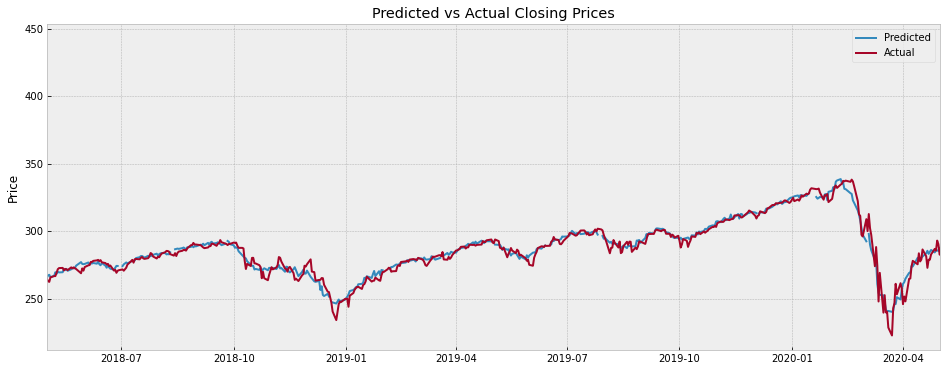

In [15]:
# Transforming the actual values to their original price
actual = pd.DataFrame(close_scaler.inverse_transform(df[["Close"]]), 
                      index=df.index, 
                      columns=[df.columns[0]])

# Getting a DF of the predicted values to validate against
predictions = validater(n_per_in, n_per_out)

# Printing the RMSE
print("RMSE:", val_rmse(actual, predictions))
    
# Plotting
plt.figure(figsize=(16,6))

# Plotting those predictions
plt.plot(predictions, label='Predicted')

# Plotting the actual values
plt.plot(actual, label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.xlim('2018-05', '2020-05')
plt.show()

                 Close
2021-08-09  390.570892
2021-08-10  389.148529
2021-08-11  389.985748
2021-08-12  389.633789
2021-08-13  391.619598
2021-08-16  390.633820
2021-08-17  389.786469
2021-08-18  389.919128
2021-08-19  388.533142
2021-08-20  389.646179
2021-08-23  388.841553
2021-08-24  388.939362
2021-08-25  389.965332
2021-08-26  388.955658
2021-08-27  389.323914
2021-08-30  387.995361
2021-08-31  391.241943
2021-09-01  390.617310
2021-09-02  391.619690
2021-09-03  392.286316
2021-09-06  394.245392
2021-09-07  391.837616
2021-09-08  393.849213
2021-09-09  393.378448
2021-09-10  392.336456
2021-09-13  394.624939
2021-09-14  394.488556
2021-09-15  394.447723
2021-09-16  393.898132
2021-09-17  393.156433


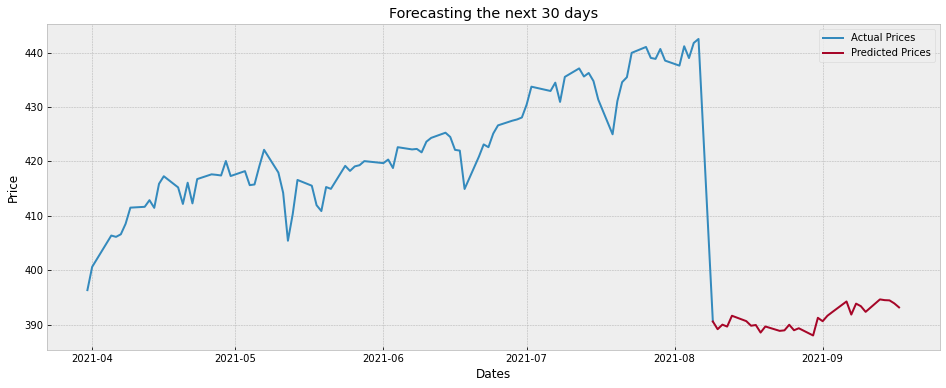

In [17]:
# Predicting off of the most recent days from the original DF
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features))

# Transforming the predicted values back to their original format
yhat = close_scaler.inverse_transform(yhat)[0]

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, 
                     index=pd.date_range(start=df.index[-1]+timedelta(days=1), 
                                         periods=len(yhat), 
                                         freq="B"), 
                     columns=[df.columns[0]])

# Number of periods back to plot the actual values
pers = n_per_in

# Transforming the actual values to their original price
actual = pd.DataFrame(close_scaler.inverse_transform(df[["Close"]].tail(pers)), 
                      index=df.Close.tail(pers).index, 
                      columns=[df.columns[0]]).append(preds.head(1))

# Printing the predicted prices
print(preds)

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.show()


source: https://towardsdatascience.com/using-deep-learning-ai-to-predict-the-stock-market-9399cf15a312